In [1]:
import h5py
import numpy as np
from scipy import linalg

In [2]:
with h5py.File('images_training.h5','r') as H:
    data = np.copy(H['data'])
with h5py.File('labels_training.h5','r') as H:
    label = np.copy(H['label'])
with h5py.File('images_testing.h5','r') as H:
    test_data = np.copy(H['data'])
with h5py.File('labels_testing_2000.h5','r') as H:
    test_label = np.copy(H['label'])

In [3]:
data = np.array(data)
test_data = np.array(test_data)
data = np.concatenate((data,test_data),axis = 0)

# Pooling Layers
    long time process with logreg accu: 0.7095 [23x23] with 20% training data
    better time process with logreg accu: 0.3018 [13x13] with 20% training data
    def reform_matrix(k,n):
        temp = data[k]
        matrix_ij = []
        for i in range(n):
            matrix_i = []
            for j in range(n):         
                max_ij = np.max(temp[i:i+16,j:j+16])
                matrix_i.append(max_ij)
            matrix_ij.append(matrix_i)
        return np.array(matrix_ij)

    n = 13
    data_ijk = []
    for k in range(len(data)):
        data_ijk.append(reform_matrix(k,n))
    data = data_ijk

# Matrix decompose by using SVD

In [4]:
def reshape(data,n):
    data_reconstructed = []
    for i in data:
        i_reconstructed = i.reshape(1,n**2)
        data_reconstructed.append(i_reconstructed[0])
    return data_reconstructed
data = reshape(data,len(data[0]))
data = np.array(data)

In [5]:
U, s, Vt = np.linalg.svd(data, full_matrices=False)
U = np.array(U)
print(np.round(s[:20],2))
np.round(U,3)

[502587.58 173748.7  112890.48  91485.05  78017.53  73115.65  60549.47
  55806.88  46362.44  45215.56  39923.45  37880.22  34661.13  32120.48
  31464.38  30610.41  30009.95  28688.77  26883.56  26633.43]


array([[-0.007, -0.005, -0.   , ..., -0.004,  0.003, -0.   ],
       [-0.007,  0.001, -0.005, ..., -0.   ,  0.   ,  0.002],
       [-0.007, -0.003, -0.002, ..., -0.004,  0.001, -0.   ],
       ...,
       [-0.004, -0.   , -0.006, ...,  0.   ,  0.001, -0.   ],
       [-0.002, -0.002, -0.001, ...,  0.   , -0.   , -0.001],
       [-0.007, -0.006, -0.006, ...,  0.002, -0.001,  0.002]])

In [6]:
data = U[:30000]
test_data = U[30000:]
print(len(data),len(test_data))

30000 5000


# Split data into train and validate data

In [7]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3,random_state=5)

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Select data into 10 class

In [8]:
class_pos = []
for i in range(10):
    temp = np.where(y_train==i)[0]
    class_pos.append(temp)
len(class_pos)

x_train_subset = []
for i in range(10):
    x_trai = []
    for j in class_pos[i]:
        x_trai.append(x_train[j])
    x_train_subset.append(x_trai)
x_train_subset = np.array(x_train_subset)
print(type(x_train_subset))

print(len(x_train_subset),len(x_train_subset[0]),len(x_train_subset[0][0]))

for i in range(10):
    print(i ,len(x_train_subset[i]),len(class_pos[i]))

<class 'numpy.ndarray'>
10 2105 784
0 2105 2105
1 2090 2090
2 2094 2094
3 2087 2087
4 2083 2083
5 2098 2098
6 2111 2111
7 2010 2010
8 2142 2142
9 2180 2180


# Classifier log Fitting function 
    Calculate w in 10 class
    maxmize likelihood in log regression function by using gradient descent
    Loss = target - predict
    Constant Bias = 1
    Predict = 1 / (1 + exp(-(Bais + sum(wi*xi)))
    dw = 0.0001(target - predict) * xi
    wi = wi * (1 + dw)
    sign each label = 1 for own x_train_subset[i], label = 0 for other x_train_subset[i]

In [9]:
def log_predict(x_train,wi,i):
    predict = 1 / (1 + np.exp(-(1 + x_train[i].dot(wi))))
    weight_hist.append(w)
    return predict

def w_claculation(i,k):
    if i in class_pos[k]:
        predict = log_predict(x_train,w[k],i)
        dw = learning_rate*(1 - predict) * x_train[i]
        w[k] = w[k] * (1 + dw)

In [10]:
w = np.ones([10,784])
learning_rate = 0.007
weight_hist = []
def class_fit(x_train,weight_hist,train_t):
    w = np.ones([10,784])
    for train_time in range (train_t):
        weight_hist.append(w)
        for i in range(len(x_train)):
            w_claculation(i,0)
            w_claculation(i,1)
            w_claculation(i,2)
            w_claculation(i,3)
            w_claculation(i,4)
            w_claculation(i,5)
            w_claculation(i,6)
            w_claculation(i,7)
            w_claculation(i,8)
            w_claculation(i,9)

In [11]:
def Class_predict(data):
    classes = []
    data = np.array(data)
    predict = 1 / (1 + np.exp(-(1 + data.dot(w.T))))
    for i in range(len(y_test)):
        classes.append(np.argmax(predict[i]))
    return np.array(classes)

In [12]:
def accuracy(classes,y_test):
    n = 0
    for i in range(len(classes)):
        if classes[i] == y_test[i]:
            n+=1
    accu = n / len(y_test)
    return np.round(accu,8)

# Training time selection

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
weight_hist = []
learning_rate = 0.007
class_fit(x_train,weight_hist,train_t = 5)

Text(0,0.5,'Accuracy')

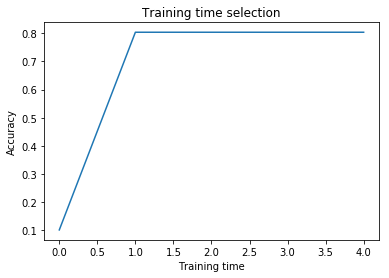

In [15]:
x_test = np.array(x_test)
x = (np.linspace(0,4,5)).astype(int)
acc_hist = []
for i in x:
    classes_predict_test = []
    predict = 1 / (1 + np.exp(-(1 + x_test.dot(weight_hist[i].T))))
    for i in range(len(predict)):
        classes_predict_test.append(np.argmax(predict[i]))

    n = 0
    for i in range(len(classes_predict_test)):
        if classes_predict_test[i] == y_test[i]:
            n+=1
    accu = n / len(y_test)
    acc_hist.append(accu)

plt.plot(x,acc_hist)
plt.title('Training time selection')
plt.xlabel('Training time')
plt.ylabel('Accuracy')

# Validation find optimize learning rate
    𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (number of correct classifications) / (total number of test examples used) ∗ 100%

In [16]:
acc_opt = []
learning_rate = np.array(list(range(1,10)))/1000
for i in learning_rate:
    weight_hist = []
    w = np.ones([10,784])
    learning_rate = i
    class_fit(x_train,weight_hist,train_t=1)
    temp = accuracy(Class_predict(x_test),y_test)
    acc_opt.append(temp)

[0.80511111, 0.80533333, 0.80533333, 0.80522222, 0.80533333, 0.80533333, 0.80544444, 0.80522222, 0.80522222]
Highes accuracy: 0.80544444
Best learning selection: 0.007


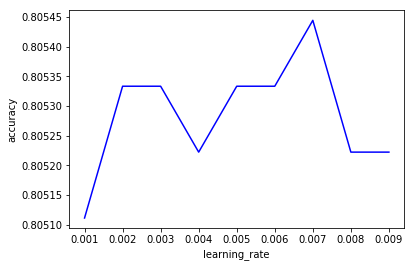

In [17]:
learning_rate_ = np.array(list(range(1,10)))/1000
plt.plot(learning_rate_, acc_opt, c='b')
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
print(acc_opt)
print('Highes accuracy:',np.max(acc_opt))
print('Best learning selection:',learning_rate_[np.argmax(acc_opt)])

# Training Model with best learning rate and training time (initial w all == 1)

In [18]:
weight_hist = []
learning_rate = learning_rate_[np.argmax(acc_opt)]
class_fit(x_train,weight_hist,train_t=1)

In [19]:
class_pos = []
for i in range(10):
    temp = np.where(y_test==i)[0]
    class_pos.append(temp)
len(class_pos)

Class_predict = Class_predict(x_test)
Class_predict_subset = []
for i in range(10):
    y_predict = []
    for j in class_pos[i]:
        y_predict.append(Class_predict[j])
    Class_predict_subset.append(y_predict)
Class_predict_subset = np.array(Class_predict_subset)
len(Class_predict_subset)

10

# Accuracy and Classification report on Validate data set

In [20]:
acc = []
for i in range(10):
    n = 0
    for j in Class_predict_subset[i]:
        if j == i:
            n += 1
    accuracy = np.round(n / len(Class_predict_subset[i]),2)
    acc.append(accuracy)
    print('Class_predict_subset',i,'accuracy:',accuracy)
print('Average accuracy:',np.round(np.average(acc),2))

Class_predict_subset 0 accuracy: 0.79
Class_predict_subset 1 accuracy: 0.95
Class_predict_subset 2 accuracy: 0.7
Class_predict_subset 3 accuracy: 0.86
Class_predict_subset 4 accuracy: 0.77
Class_predict_subset 5 accuracy: 0.78
Class_predict_subset 6 accuracy: 0.48
Class_predict_subset 7 accuracy: 0.9
Class_predict_subset 8 accuracy: 0.91
Class_predict_subset 9 accuracy: 0.91
Average accuracy: 0.8


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Class_predict))

             precision    recall  f1-score   support

          0       0.76      0.79      0.78       906
          1       0.96      0.95      0.95       866
          2       0.73      0.70      0.72       926
          3       0.80      0.86      0.83       915
          4       0.69      0.77      0.72       946
          5       0.89      0.78      0.83       930
          6       0.65      0.48      0.55       856
          7       0.85      0.90      0.88       885
          8       0.89      0.91      0.90       860
          9       0.82      0.91      0.87       910

avg / total       0.80      0.81      0.80      9000



confusion matrix:
[[716   4  16  79   8   1  58   1  21   2]
 [  2 822   7  28   3   0   4   0   0   0]
 [ 32   4 651  12 169   5  37   1  15   0]
 [ 34  19  15 787  29   3  21   1   5   1]
 [  4   5  68  42 724   2  89   0  12   0]
 [  0   0   0   0   0 725   0  82  23 100]
 [144   2 126  31 113   8 410   1  21   0]
 [  0   0   0   0   0  21   0 797   3  64]
 [  5   1   3   6  10  21  12   7 785  10]
 [  0   0   0   0   0  33   0  45   0 832]]


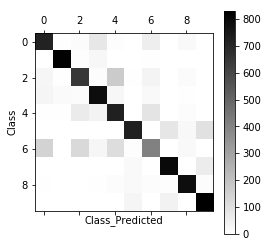

In [22]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:')
conf = confusion_matrix(y_test, Class_predict)
print(conf)

_ = plt.matshow(conf, cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('Class')
_ = plt.xlabel('Class_Predicted')

# Calculated Weight

In [23]:
print(np.round(w[:,:7],5))
print('Range of w:',np.max(w),np.min(w))

[[0.9494  0.95965 0.99879 1.02523 0.98641 0.92033 0.98965]
 [0.9624  0.94383 1.06206 0.98448 1.04477 1.03933 1.03539]
 [0.94384 0.99832 0.94688 0.98054 1.02618 1.01347 1.00246]
 [0.95698 0.95206 1.04984 1.00562 0.98092 1.01124 1.00173]
 [0.94051 0.99084 0.96311 0.97241 1.00323 1.0375  0.96634]
 [0.98018 1.0396  1.0187  0.99935 0.99653 0.99875 1.00382]
 [0.94918 0.98757 0.96922 0.99571 0.99287 0.99013 0.99312]
 [0.97535 1.0545  1.05214 0.94429 0.98249 0.98312 1.00542]
 [0.94892 1.04788 0.99282 0.99655 0.9447  1.00484 1.04851]
 [0.95508 1.0757  1.04583 1.07647 1.03636 1.01092 0.96577]]
Range of w: 1.07647432215585 0.9203279061613205


# Testing model on test data set

In [24]:
classes_predict_test = []
data = np.array(data)
predict = 1 / (1 + np.exp(-(1 + test_data.dot(w.T))))
for i in range(len(test_data)):
    classes_predict_test.append(np.argmax(predict[i]))
classes_predict_test = np.array(classes_predict_test)

output = classes_predict_test[2000:]
print(len(output))

3000


In [25]:
n = 0
for i in range(2000):
    if classes_predict_test[i] == test_label[i]:
        n += 1
accuracy = np.round((n / 2000),2)
accuracy

0.8

In [26]:
print(classification_report(test_label, classes_predict_test[:2000]))

             precision    recall  f1-score   support

          0       0.75      0.78      0.76       178
          1       0.98      0.96      0.97       191
          2       0.73      0.69      0.71       210
          3       0.77      0.85      0.81       191
          4       0.66      0.77      0.71       212
          5       0.92      0.75      0.83       214
          6       0.63      0.44      0.52       200
          7       0.86      0.93      0.89       198
          8       0.87      0.90      0.88       219
          9       0.82      0.95      0.88       187

avg / total       0.80      0.80      0.80      2000



confusion matrix:
[[139   1   2  16   0   0  13   0   6   1]
 [  0 184   1   5   0   0   1   0   0   0]
 [  6   1 144   1  41   1  11   0   5   0]
 [ 10   1   2 163   9   1   2   0   3   0]
 [  0   0  16   9 163   0  21   0   3   0]
 [  0   0   1   1   0 160   0  22   4  26]
 [ 30   0  29  15  29   0  88   0   9   0]
 [  0   0   0   0   0   5   0 185   0   8]
 [  1   0   1   2   5   4   2   3 197   4]
 [  0   0   0   0   0   2   1   6   0 178]]


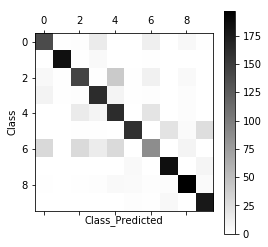

In [27]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:')
conf = confusion_matrix(test_label, classes_predict_test[:2000])
print(conf)

_ = plt.matshow(conf, cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('Class')
_ = plt.xlabel('Class_Predicted')

# Output data

In [28]:
with h5py.File('predicted_labels.h5','w') as H:
    H.create_dataset('label',data=output)

In [29]:
with h5py.File('predicted_labels.h5','r') as H:
    data = np.copy(H['label'])

In [30]:
len(data)

3000

In [31]:
break

SyntaxError: 'break' outside loop (<ipython-input-31-6aaf1f276005>, line 1)

# This part only use for comparation between import log regression and new method provide above
    In traditional way the fitting process is super long which is over 20 mins or even more, but almost same accuracy: 0.813 which only 0.005 higher.
    Instead the using by SVD to transform data as eigenvector, will save much more times, where process is less than 10 seconds.

# Log reg check
    0.66 by using U with 20% training data (fast process)
    0.7455 with full data with 20% training data (longtime process)

In [ ]:
import h5py
import numpy as np
with h5py.File('images_training.h5','r') as H:
    data = np.copy(H['data'])
with h5py.File('labels_training.h5','r') as H:
    label = np.copy(H['label'])

In [ ]:
def reshape(data,n):
    data_reconstructed = []
    for i in data:
        i_reconstructed = i.reshape(1,n**2)
        data_reconstructed.append(i_reconstructed[0])
    return data_reconstructed
data = reshape(data,len(data[0]))
data = np.array(data)

In [ ]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
ols = LogisticRegression()
ols.fit(x_train, y_train)

In [ ]:
def accuracy(classes,y_test):
    n = 0
    for i in range(len(classes)):
        if classes[i] == y_test[i]:
            n+=1
    accu = n / len(y_test)
    return np.round(accu,8)
print('Accuracy:',accuracy(ols.predict(x_test),y_test))